# Titanic Survival Prediction

Using passenger data from the titanic, We will make a model to predict which passengers would survive.

In [20]:
# imports
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from sklearn import tree

Read in and analyse the data:

In [21]:
df = pd.read_csv('titanic_train.csv')

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [26]:
df.shape

(891, 12)

In [27]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The dataset has 891 rows of data and 12 columns. Both age and cabin have null values. Five of the columns are non-numerical.

Analysis of each separate column:

In [28]:
def column_analysis(col):
    counts = df[col].value_counts()
    print(counts)
    plt.bar(counts.index, counts.values)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


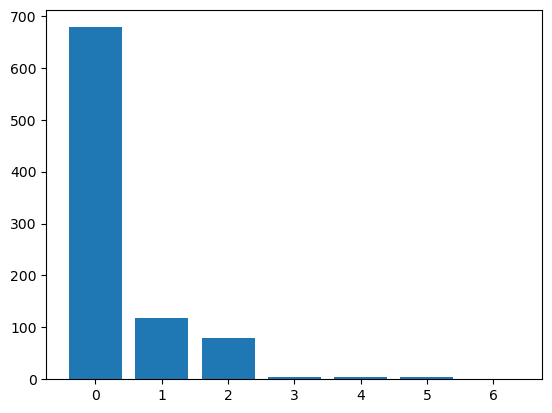

In [29]:
column_analysis('Parch')

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64


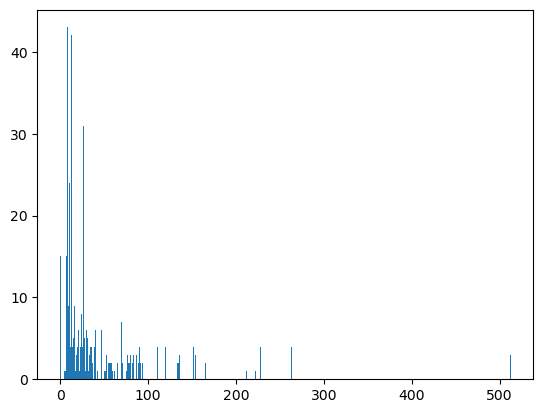

In [30]:
column_analysis('Fare')

<AxesSubplot: >

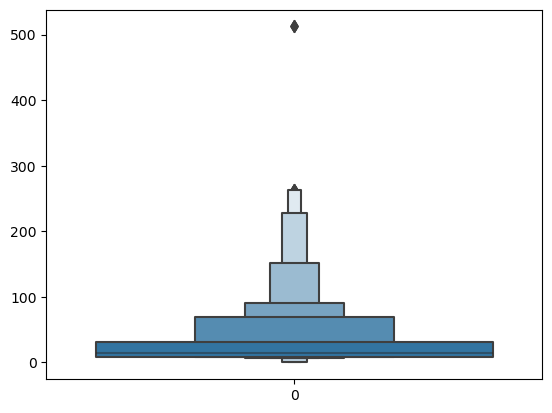

In [31]:
sns.boxenplot(df["Fare"])

In [32]:
correlation=df.corr()
print(correlation["Survived"])

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64


<AxesSubplot: xlabel='Fare', ylabel='Age'>

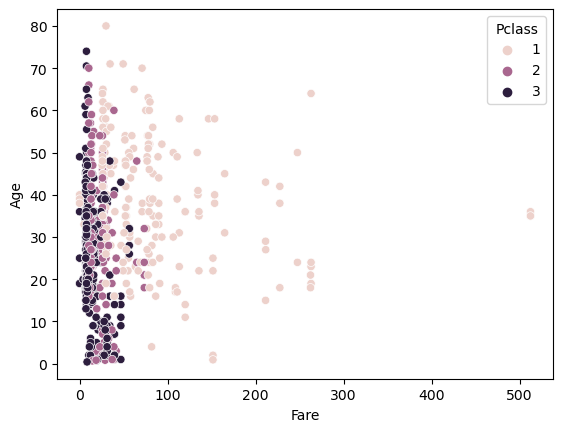

In [33]:

sns.scatterplot(data=df, x="Fare", y="Age", hue='Pclass')

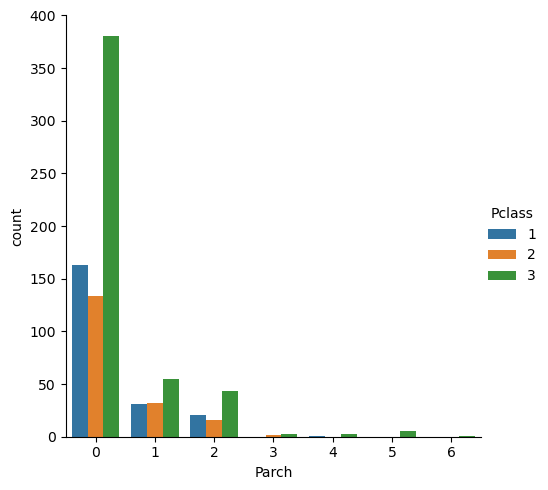

In [34]:
import seaborn as sns
sns.catplot(data=df, x="Parch", kind="count", hue="Pclass")

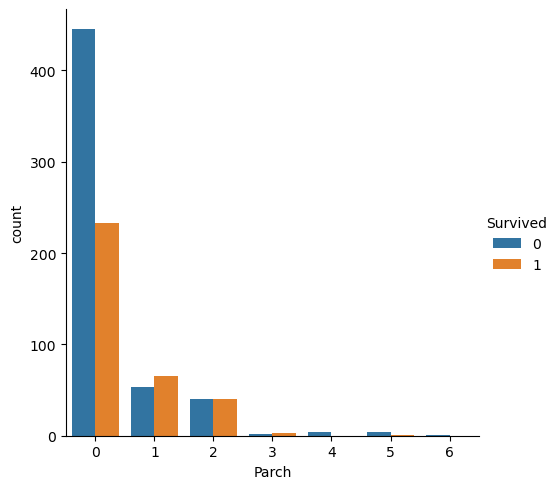

In [35]:
sns.catplot(data=df, x="Parch", kind="count", hue="Survived")

Text(0.5, 1.05, 'Correlation between Parch, survival and class')

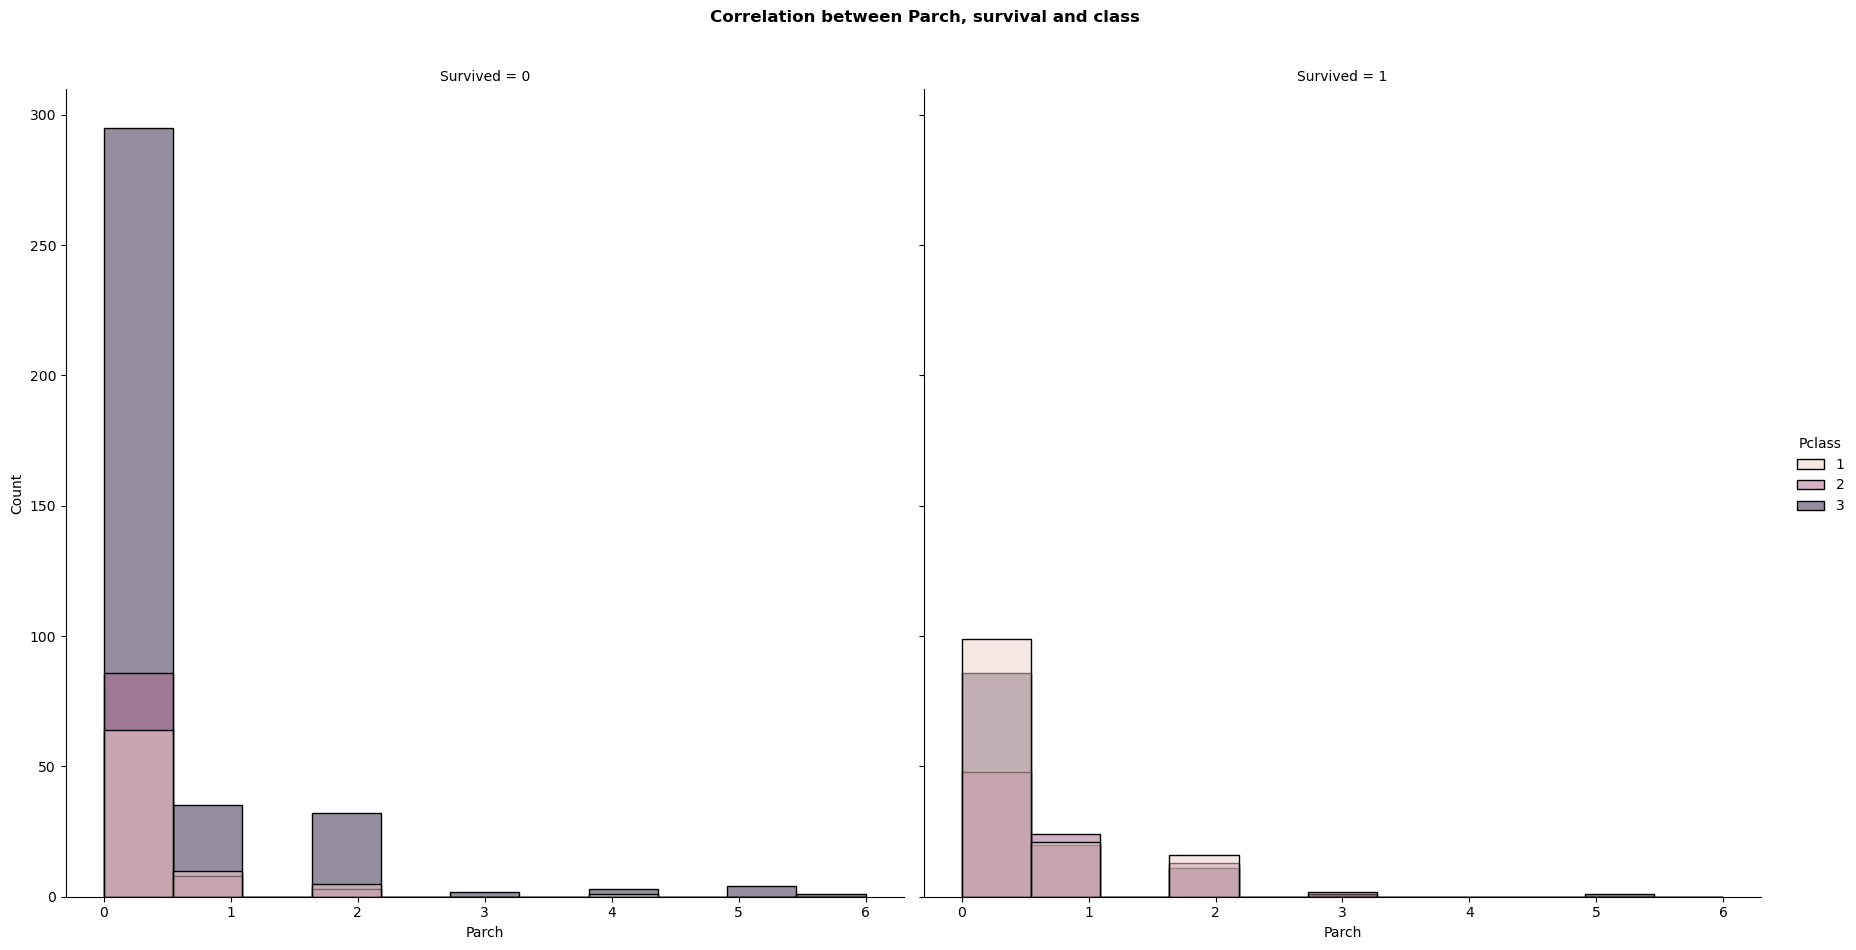

In [36]:
sns.displot(data=df,x='Parch', kde=False, col="Survived", hue="Pclass", height=9)
plt.suptitle("Correlation between Parch, survival and class", y=1.05, weight="demi")

In [37]:
df[df["Fare"]==df["Fare"].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [38]:
df[df["SibSp"]==df["SibSp"].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [39]:
df['TicketPrefix']=df["Ticket"].str.extract(r'([^\d]*)')

In [40]:
df['TicketPrefix'] = df['TicketPrefix'].map( lambda x: re.sub('[.]', '', x) )


In [41]:
df['TicketPrefix']=df['TicketPrefix'].str.split('/').str[0]
df['TicketPrefix']=df['TicketPrefix'].str.split(' ').str[0]
df['TicketPrefix'] = df['TicketPrefix'].replace(r'^\s*$', "number ticket", regex=True)
df['TicketPrefix'] = df['TicketPrefix'].map( lambda x: re.sub('STON', 'SOTON', x) )

In [42]:
df["TicketPrefix"].unique()

array(['A', 'PC', 'SOTON', 'number ticket', 'PP', 'CA', 'SC', 'SP', 'SOC',
       'SO', 'W', 'WEP', 'C', 'SOP', 'Fa', 'LINE', 'FCC', 'SW', 'SCO',
       'P', 'WE', 'FC'], dtype=object)

In [43]:
count={}
for val in df["TicketPrefix"]:
    if val != "number ticket":
        count[val]=(df[(df["TicketPrefix"]== val)]['Pclass'].value_counts())

In [44]:
print(count)

{'A': 3    29
Name: Pclass, dtype: int64, 'PC': 1    60
Name: Pclass, dtype: int64, 'SOTON': 3    35
Name: Pclass, dtype: int64, 'PP': 3    3
Name: Pclass, dtype: int64, 'CA': 3    22
2    20
Name: Pclass, dtype: int64, 'SC': 2    15
3     1
Name: Pclass, dtype: int64, 'SP': 3    1
Name: Pclass, dtype: int64, 'SOC': 2    5
Name: Pclass, dtype: int64, 'SO': 2    3
3    1
Name: Pclass, dtype: int64, 'W': 3    7
2    3
Name: Pclass, dtype: int64, 'WEP': 1    1
Name: Pclass, dtype: int64, 'C': 3    5
Name: Pclass, dtype: int64, 'SOP': 2    1
Name: Pclass, dtype: int64, 'Fa': 3    1
Name: Pclass, dtype: int64, 'LINE': 3    4
Name: Pclass, dtype: int64, 'FCC': 2    5
Name: Pclass, dtype: int64, 'SW': 2    2
Name: Pclass, dtype: int64, 'SCO': 2    1
Name: Pclass, dtype: int64, 'P': 2    2
Name: Pclass, dtype: int64, 'WE': 1    2
Name: Pclass, dtype: int64, 'FC': 1    1
Name: Pclass, dtype: int64}


In [45]:
df2=df[(df['TicketPrefix']!='number ticket')]

Text(0.5, 1.05, 'Correlation between ticket, survival and class')

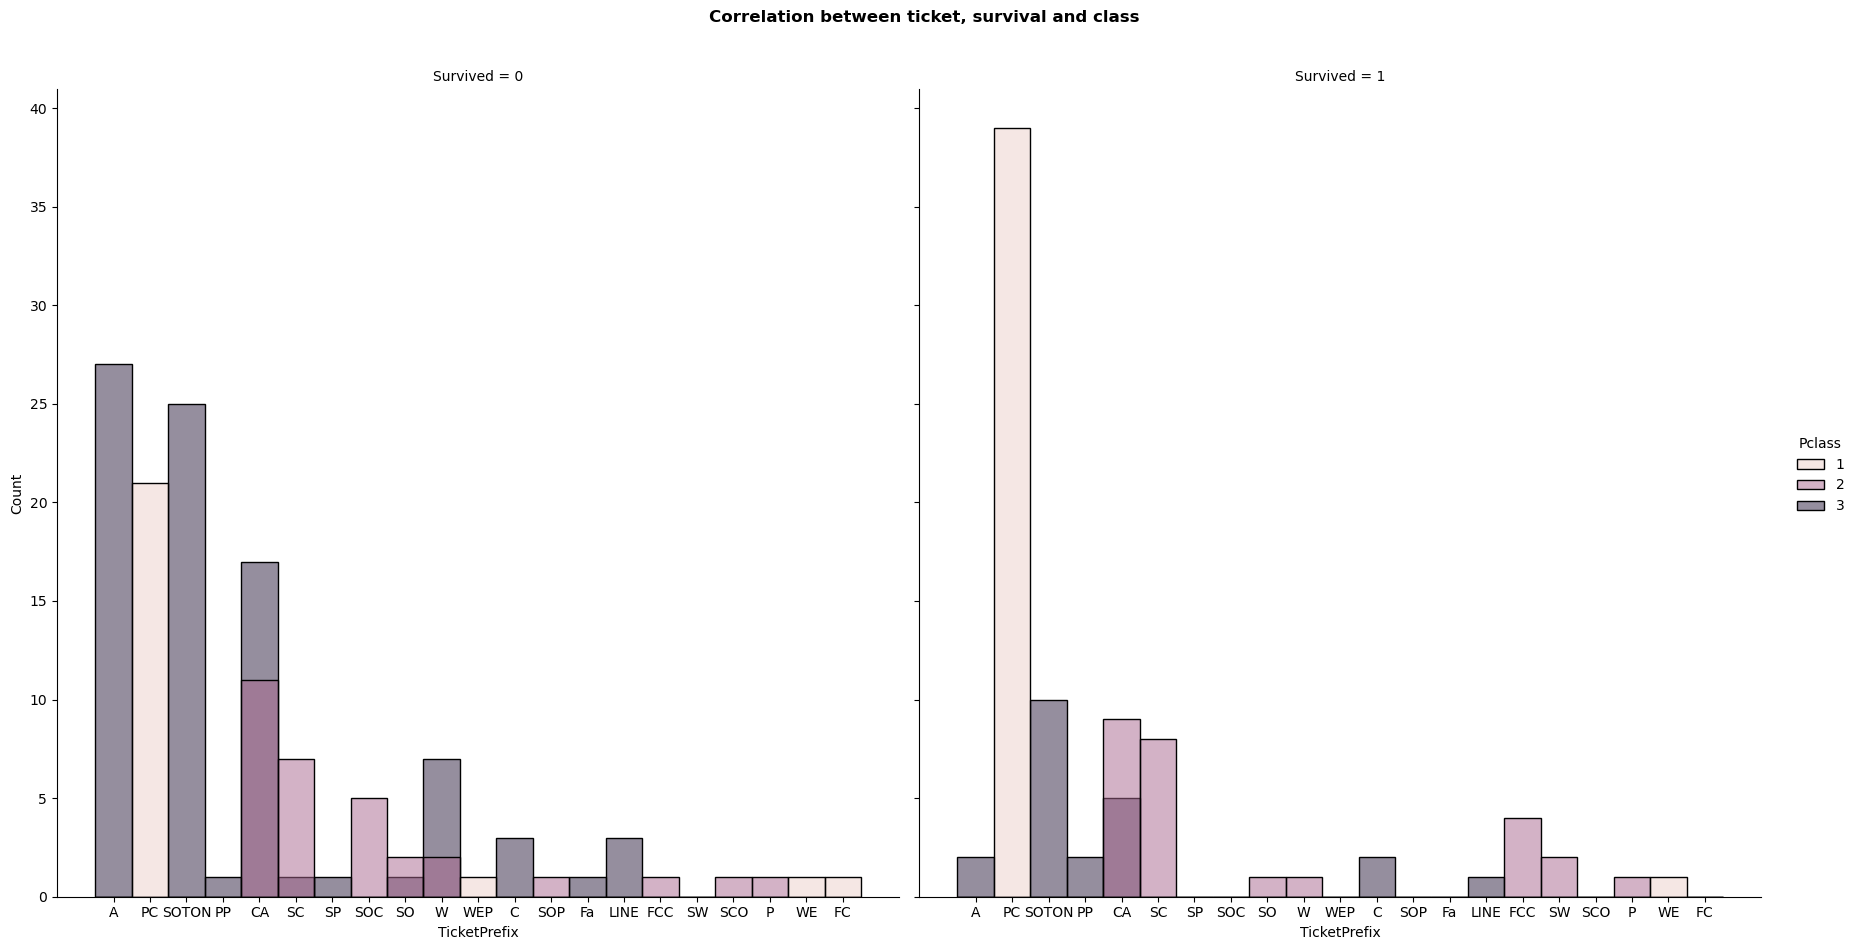

In [53]:
plot=sns.displot(data=df2,x='TicketPrefix', kde=False, col="Survived", hue="Pclass", height=9)
plt.suptitle("Correlation between ticket, survival and class", y=1.05, weight="demi")

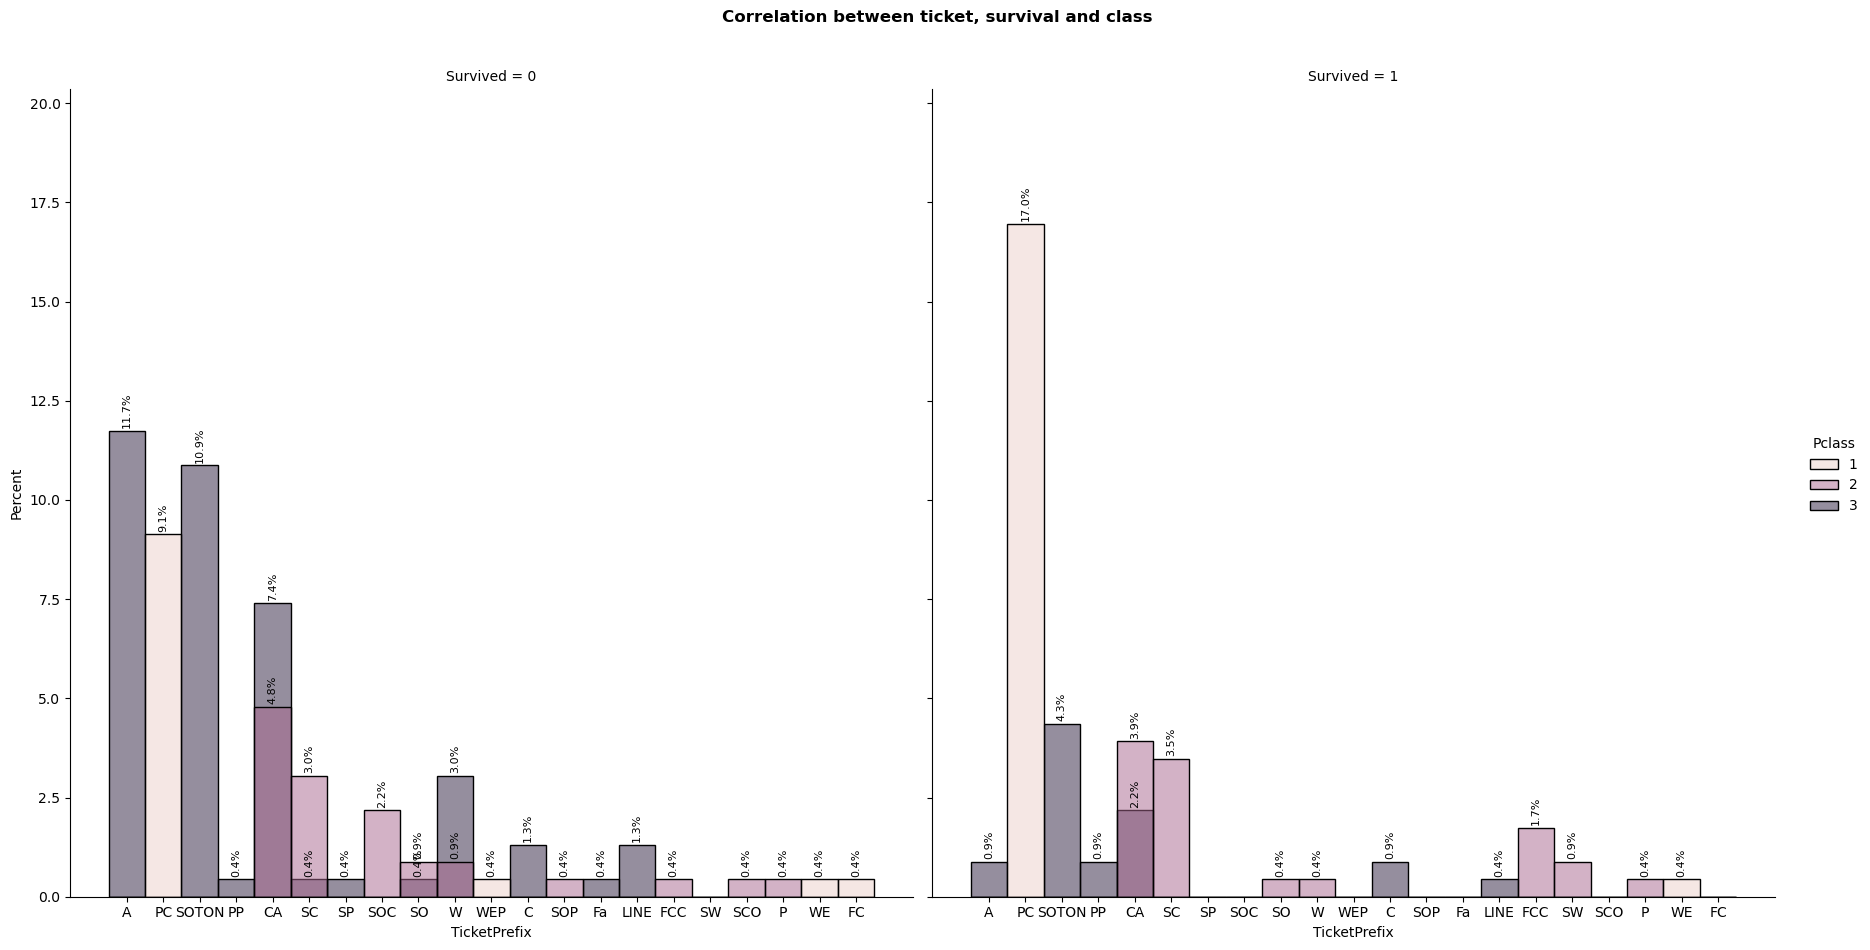

In [52]:
plot=sns.displot(data=df2,x='TicketPrefix', kde=False, col="Survived", hue="Pclass", stat='percent', height=9)
plt.suptitle("Correlation between ticket, survival and class", y=1.05, weight="demi")
for ax in plot.axes.ravel():
    
    # add annotations
    for c in ax.containers:

        # custom label calculates percent and add an empty string so 0 value bars don't have a number
        labels = [f'{w:0.1f}%' if (w := v.get_height()) > 0 else '' for v in c]

        ax.bar_label(c, labels=labels, label_type='edge', fontsize=8, rotation=90, padding=2)
    
    ax.margins(y=0.2)

plt.show()

In [59]:
df[df["Age"]==np.NaN]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketPrefix


In [60]:
df["Age"].value_counts(dropna=False)

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 89, dtype: int64